In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import time

In [ ]:
import io
data = pd.read_excel('Maindata.xlsx')
data.head()

,Zone,Dealer Code,Dealer Name,Transaction No.,Description,Status,Posting Date,IRT,CATEGORY,IRTSTATUS,MPT,MPTSTATUS,Changed On,TRANSACTIONTYPE,Created By,Reported By,Object GUID
0,NaN,NaN,NaN,2000095635,Medium,Open,2022-05-06,0,Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,ANANDSHARMA,NaN,0
1,NaN,NaN,NaN,1000003085,Very High,Open,2022-05-06,0,NaN,NaN,0,NaN,2022-05-06,MG Parts Support,S309PRM0001,NaN,0
2,NaN,NaN,NaN,1000003086,Medium,Open,2022-05-06,0,NaN,NaN,0,NaN,2022-05-06,MG Parts Support,WW14PRM0001,NaN,0
3,NaN,NaN,NaN,2000095644,Very High,Open,2022-05-06,0,After Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,DW02HSR0001,NaN,0
4,NaN,NaN,NaN,2000095646,High,Open,2022-05-06,0,Sales,NaN,0,NaN,2022-05-06,MG_MOTORS_Incident,DE04CRE0001,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97125 entries, 0 to 97124
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Zone             95080 non-null  object        
 1   Dealer Code      95080 non-null  object        
 2   Dealer Name      95056 non-null  object        
 3   Transaction No.  97125 non-null  int64         
 4   Description      97118 non-null  object        
 5   Status           97125 non-null  object        
 6   Posting Date     97125 non-null  datetime64[ns]
 7   IRT              97125 non-null  int64         
 8   CATEGORY         92095 non-null  object        
 9   IRTSTATUS        3790 non-null   object        
 10  MPT              97125 non-null  int64         
 11  MPTSTATUS        10610 non-null  object        
 12  Changed On       97125 non-null  datetime64[ns]
 13  TRANSACTIONTYPE  97124 non-null  object        
 14  Created By       97125 non-null  objec

In [ ]:
data.isnull().sum()

Zone                2045
Dealer Code         2045
Dealer Name         2069
Transaction No.        0
Description            7
Status                 0
Posting Date           0
IRT                    0
CATEGORY            5030
IRTSTATUS          93335
MPT                    0
MPTSTATUS          86515
Changed On             0
TRANSACTIONTYPE        1
Created By             0
Reported By         6192
Object GUID            0
dtype: int64

In [ ]:
data.drop(columns=["IRTSTATUS","MPTSTATUS","Object GUID"],axis=1,inplace=True)

In [ ]:
data.columns=["zone","dealer_code","dealer_name","trans_no.","description","status","posting_date","IRT","category","MPT","changed_on","transaction_type","created_by","reported_by"]
data.head()

,zone,dealer_code,dealer_name,trans_no.,description,status,posting_date,IRT,category,MPT,changed_on,transaction_type,created_by,reported_by
0,NaN,NaN,NaN,2000095635,Medium,Open,2022-05-06,0,Sales,0,2022-05-06,MG_MOTORS_Incident,ANANDSHARMA,NaN
1,NaN,NaN,NaN,1000003085,Very High,Open,2022-05-06,0,NaN,0,2022-05-06,MG Parts Support,S309PRM0001,NaN
2,NaN,NaN,NaN,1000003086,Medium,Open,2022-05-06,0,NaN,0,2022-05-06,MG Parts Support,WW14PRM0001,NaN
3,NaN,NaN,NaN,2000095644,Very High,Open,2022-05-06,0,After Sales,0,2022-05-06,MG_MOTORS_Incident,DW02HSR0001,NaN
4,NaN,NaN,NaN,2000095646,High,Open,2022-05-06,0,Sales,0,2022-05-06,MG_MOTORS_Incident,DE04CRE0001,NaN


In [ ]:
date_tickets = data.groupby(["posting_date"]).agg({"description":"count"})
date_tickets.reset_index(inplace=True)
date_tickets.head()

,posting_date,description
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
date_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posting_date  794 non-null    datetime64[ns]
 1   description   794 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 12.5 KB


In [ ]:
# date_tickets['posting_date'] = date_tickets["posting_date"].astype('datetime64[D]')
date_tickets['posting_date'] = pd.to_datetime(date_tickets['posting_date'])
date_tickets.head()

,posting_date,description
0,2020-02-27,1
1,2020-02-28,14
2,2020-02-29,4
3,2020-03-02,1
4,2020-03-03,2


In [ ]:
date_tickets["dates"] = date_tickets["posting_date"] - pd.to_datetime('1/1/2020')
date_tickets["dates"] = date_tickets["dates"].dt.days

In [ ]:
date_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   posting_date  794 non-null    datetime64[ns]
 1   description   794 non-null    int64         
 2   dates         794 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 18.7 KB


In [ ]:
date_tickets.head()

,posting_date,description,dates
0,2020-02-27,1,57
1,2020-02-28,14,58
2,2020-02-29,4,59
3,2020-03-02,1,61
4,2020-03-03,2,62


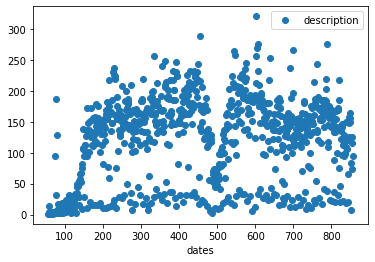

In [ ]:
date_tickets.plot(x='dates', y='description', style='o')

In [ ]:
x = date_tickets["dates"]
y = date_tickets["description"]

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            description   R-squared (uncentered):                   0.697
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              1825.
Date:                Tue, 19 Jul 2022   Prob (F-statistic):                   7.48e-208
Time:                        18:55:44   Log-Likelihood:                         -4576.8
No. Observations:                 794   AIC:                                      9156.
Df Residuals:                     793   BIC:                                      9160.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dates          0.2278      0.005     42.719      0.000       0.217       0.238
==============================================================================
Omnibus:                       21.702   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.774
Skew:                          -0.238   Prob(JB):                     0.000376
Kurtosis:                       2.501   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#R-squared = R2 =0.697
#Model accuracy = 69.7%